In [1]:
import pandas as pd

# read data
reviews_df = pd.read_excel("data/ReviewsFileName.xlsx")

In [2]:
reviews_df.head()

,Review,Sentiment
0,the rock is destined to be the 21st century's ...,0
1,"the gorgeously elaborate continuation of "" the...",0
2,effective but too-tepid biopic\n,0
3,if you sometimes like to go to the movies to h...,0
4,"emerges as something rare , an issue movie tha...",0


In [3]:
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)

In [4]:
reviews_df.head()

,Review,Sentiment
6830,"a dark , dull thriller with a parting shot tha...",1
8600,director chris eyre is going through the paces...,1
4080,"although it lacks the detail of the book , the...",0
3079,the script by david koepp is perfectly service...,0
582,"an exciting and involving rock music doc , a s...",0


In [5]:
x = reviews_df['Review'][:1]
x

6830    a dark , dull thriller with a parting shot tha...
Name: Review, dtype: object

In [6]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
from bs4 import BeautifulSoup

In [7]:
def remove_HTML(text):
    soup = BeautifulSoup(text, "lxml")
    html_free = soup.get_text()
    return html_free

In [8]:
stop = stopwords.words('english')

In [9]:
def _create_dictionary_table(text_string) -> dict:
   
    #removing stop words
    stop_words = set(stopwords.words("english"))
    #print(text_string)
    words = word_tokenize(text_string)
    
    #reducing words to their root form
    stem = PorterStemmer()
    
    #creating dictionary for the word frequency table
    frequency_table = dict()
    for wd in words:
        wd = stem.stem(wd)
        if wd in stop_words:
            continue
        if wd in frequency_table:
            frequency_table[wd] += 1
        else:
            frequency_table[wd] = 1

    return frequency_table

In [10]:
def clean_text(text):
    # lower text
    
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    #print(text)
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    text = [re.sub(r"'s\b","",str(x)) for x in text ]
    # lemmatize text
    #text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    #text = [stemer.stem(i) for i in text]
    text =  [remove_HTML(x) for x in text]
    text =  [re.sub("[^a-zA-Z]"," ",str(x)) for x in text]
    #text = " ".join([stemer.stem(i) for i in text])
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["Review"] = reviews_df["Review"].apply(lambda x: clean_text(x))

In [11]:
reviews_df.head()

,Review,Sentiment
6830,dark dull thriller parting shot misfires,1
8600,director chris eyre going paces usual high mel...,1
4080,although lacks detail book film pack serious s...,0
3079,script david koepp perfectly serviceable gives...,0
582,exciting involving rock music doc smart satisf...,0


In [12]:
reviews_df['Review']

6830             dark dull thriller parting shot misfires
8600    director chris eyre going paces usual high mel...
4080    although lacks detail book film pack serious s...
3079    script david koepp perfectly serviceable gives...
582     exciting involving rock music doc smart satisf...
                              ...                        
1113    rigorously structured exquisitely filmed drama...
4665    berling b art continue impress isabelle hupper...
2611    featherweight romantic comedy nice twists stan...
718     simple heart warming story full mirth charm cy...
9654    watchable point situations dialogue spin hopel...
Name: Review, Length: 1066, dtype: object

In [13]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
fdist = FreqDist()

In [14]:
# import string
# input_str = "This &is [an] example? {of} string. with.? punctuation!!!!" # Sample string
# result = input_str.translate(string.table("",""), string.punctuation)
# print(result)

In [15]:
review_word_tokenize = word_tokenize(" ".join(reviews_df['Review']))

In [16]:
review_word_tokenize[:10]

['dark',
 'dull',
 'thriller',
 'parting',
 'shot',
 'misfires',
 'director',
 'chris',
 'eyre',
 'going']

In [17]:
for word in review_word_tokenize:
    fdist[word.lower()]+=1

In [18]:
fdist

FreqDist({'film': 157, 'movie': 146, 'one': 65, 'like': 60, 'story': 52, 'time': 51, 'much': 46, 'characters': 45, 'comedy': 41, 'good': 39, ...})

In [19]:
fdist_top30=fdist.most_common(30)

In [20]:
fdist_top30

[('film', 157),
 ('movie', 146),
 ('one', 65),
 ('like', 60),
 ('story', 52),
 ('time', 51),
 ('much', 46),
 ('characters', 45),
 ('comedy', 41),
 ('good', 39),
 ('director', 38),
 ('even', 37),
 ('well', 35),
 ('life', 35),
 ('never', 35),
 ('see', 32),
 ('best', 30),
 ('way', 29),
 ('would', 29),
 ('may', 27),
 ('makes', 27),
 ('action', 27),
 ('enough', 27),
 ('bad', 27),
 ('two', 25),
 ('funny', 25),
 ('real', 25),
 ('drama', 25),
 ('us', 24),
 ('plot', 24)]

In [21]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["Review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["Review"].apply(lambda x: len(x.split(" ")))

In [53]:
reviews_df.head()

,Review,Sentiment,nb_chars,nb_words
6830,dark dull thriller parting shot misfires,1,40,6
8600,director chris eyre going paces usual high mel...,1,72,10
4080,although lacks detail book film pack serious s...,0,53,8
3079,script david koepp perfectly serviceable gives...,0,90,12
582,exciting involving rock music doc smart satisf...,0,79,11


In [22]:
# feature selection
label = "Sentiment"
ignore_cols = [label, "nb_chars"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.33, random_state = 42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(714, 2)
(352, 2)
(714,)
(352,)


In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.field]
class NumberSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[[self.field]]

In [37]:
def Tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [48]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
classifier = Pipeline([
    ('features', FeatureUnion([
        ('Review', Pipeline([
            ('colext', TextSelector('Review')),
            ('tfidf', TfidfVectorizer(tokenizer=Tokenizer, stop_words=stop,
                     min_df=7, max_df=0.3, ngram_range=(1,2))), #for XGB
        ])),
        ('words', Pipeline([
            ('wordext', NumberSelector('nb_words')),
            ('wscaler', StandardScaler()),
        ])),
    ])),
    ('clf', RandomForestClassifier()),
#    ('clf', XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1))),
    ])

In [49]:
classifier.fit(X_train, y_train)

C:\Users\NRLM-MAYANK\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\NRLM-MAYANK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('Review',
                                                 Pipeline(memory=None,
                                                          steps=[('colext',
                                                                  TextSelector(field='Review')),
                                                                 ('tfidf',
                                                                  TfidfVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.float64'>,
                                                                                  encoding='utf-8',
               

In [50]:
preds = classifier.predict(X_test)

In [51]:
z= preds[preds==1]
len(z)

179

In [52]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

Accuracy: 0.5880681818181818
Precision: 0.6089385474860335
              precision    recall  f1-score   support

           0       0.57      0.58      0.57       168
           1       0.61      0.59      0.60       184

    accuracy                           0.59       352
   macro avg       0.59      0.59      0.59       352
weighted avg       0.59      0.59      0.59       352

[[ 98  70]
 [ 75 109]]


In [447]:
# # add number of characters column
# reviews_df["nb_chars"] = reviews_df["Review"].apply(lambda x: len(x))

# # add number of words column
# reviews_df["nb_words"] = reviews_df["Review"].apply(lambda x: len(x.split(" ")))

In [33]:
# reviews_df.head()

,Review,Sentiment,nb_chars,nb_words
6830,dark dull thriller part shot misfire,1,36,6
8600,director chris eyre go pace usual high melodra...,1,68,10
4080,although lack detail book film pack serious su...,0,52,8
3079,script david koepp perfectly serviceable give ...,0,88,12
582,excite involve rock music doc smart satisfy lo...,0,72,11


In [35]:
# # create doc2vec vector columns
# from gensim.test.utils import common_texts
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["Review"].apply(lambda x: x.split(" ")))]

# # train a Doc2Vec model with our text data
# model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# # transform each document into a vector data
# doc2vec_df = reviews_df["Review"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
# doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
# reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [36]:
reviews_df

,Review,Sentiment,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
6830,dark dull thriller part shot misfire,1,36,6,-0.035208,-0.083720,-0.092846,0.068022,-0.043371
8600,director chris eyre go pace usual high melodra...,1,68,10,0.037296,-0.003613,0.029855,-0.029634,-0.013085
4080,although lack detail book film pack serious su...,0,52,8,0.064063,0.027152,-0.076584,0.093097,-0.096409
3079,script david koepp perfectly serviceable give ...,0,88,12,0.074626,0.035462,-0.043413,0.049862,0.002999
582,excite involve rock music doc smart satisfy lo...,0,72,11,0.077217,0.054142,0.008153,0.057337,0.014497
...,...,...,...,...,...,...,...,...,...
1113,rigorously structure exquisitely filmed drama ...,0,89,12,0.096345,0.035946,0.087047,0.089019,0.078261
4665,berling béart continue impress isabelle hupper...,0,85,12,-0.032117,-0.008415,0.025901,-0.063671,0.078531
2611,featherweight romantic comedy nice twist stand...,0,89,12,-0.095247,-0.076835,-0.051974,-0.052549,0.088589
718,simple heart-warming story full mirth charm cy...,0,51,7,0.047808,0.029719,0.093980,-0.064508,-0.079527


In [37]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(min_df = 10)
# tfidf_result = tfidf.fit_transform(reviews_df["Review"]).toarray()
# tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
# tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
# tfidf_df.index = reviews_df.index
# reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [39]:
reviews_df.head()

,Review,Sentiment,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_act,...,word_way,word_well,word_without,word_work,word_world,word_worth,word_would,word_writer,word_year,word_young
6830,dark dull thriller part shot misfire,1,36,6,-0.035208,-0.083720,-0.092846,0.068022,-0.043371,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8600,director chris eyre go pace usual high melodra...,1,68,10,0.037296,-0.003613,0.029855,-0.029634,-0.013085,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4080,although lack detail book film pack serious su...,0,52,8,0.064063,0.027152,-0.076584,0.093097,-0.096409,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3079,script david koepp perfectly serviceable give ...,0,88,12,0.074626,0.035462,-0.043413,0.049862,0.002999,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
582,excite involve rock music doc smart satisfy lo...,0,72,11,0.077217,0.054142,0.008153,0.057337,0.014497,0.0,...,0.0,0.0,0.0,0.0,0.472797,0.0,0.0,0.0,0.0,0.0


In [41]:
# reviews_df.shape

(1066, 180)

In [40]:
# reviews_df["Sentiment"].value_counts(normalize = True)

1    0.515009
0    0.484991
Name: Sentiment, dtype: float64

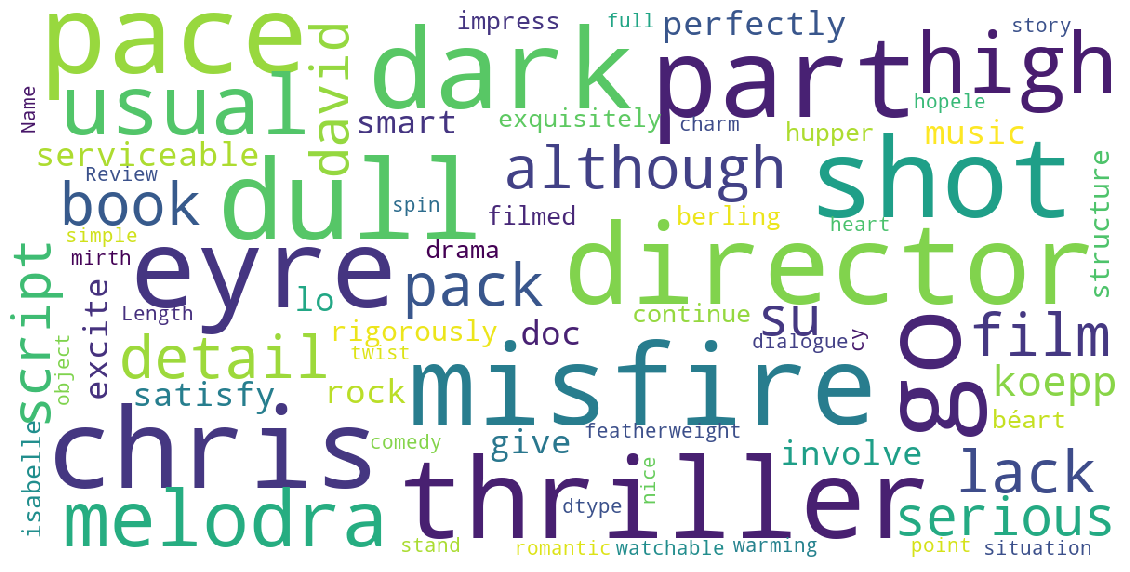

In [42]:
# wordcloud function

# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# def show_wordcloud(data, title = None):
#     wordcloud = WordCloud(
#         background_color = 'white',
#         max_words = 200,
#         max_font_size = 40, 
#         scale = 3,
#         random_state = 42
#     ).generate(str(data))

#     fig = plt.figure(1, figsize = (20, 20))
#     plt.axis('off')
#     if title: 
#         fig.suptitle(title, fontsize = 20)
#         fig.subplots_adjust(top = 2.3)

#     plt.imshow(wordcloud)
#     plt.show()
    
# # print wordcloud
# show_wordcloud(reviews_df["Review"])

In [45]:
# highest positive sentiment reviews (with more than 5 words)
# reviews_df[reviews_df["nb_words"] >= 5].sort_values("Sentiment", ascending = False)[["Review", "Sentiment"]].head(10)

,Review,Sentiment
6830,dark dull thriller part shot misfire,1
10273,godard become judge praise love sort bitter ol...,1
8977,trap present frighten compel scenario give par...,1
9168,romantic/comedy ask question much souvlaki tak...,1
9004,three hour little story character development ...,1
6545,fit movie artificial soulless country bear owe...,1
6914,excessive profane pack cartoonish violence com...,1
10308,hopefully it'll dollar theatre time christmas ...,1
5639,thing frustrate film buff see otherwise good m...,1
7108,egotistical endeavor daughter horror director ...,1


TypeError: len() of unsized object

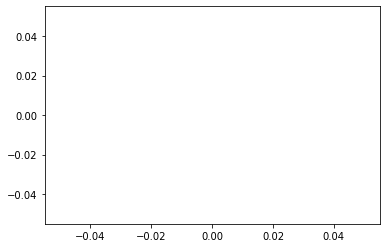

In [49]:
# plot sentiment distribution for positive and negative reviews

# import seaborn as sns

# for x in [0, 1]:
#     subset = reviews_df[reviews_df['Sentiment'] == x]
    
#     # Draw the density plot
#     if x == 0:
#         label = "Good reviews"
#     else:
#         label = "Bad reviews"
#     sns.distplot(x, hist = False, label = label)

In [53]:
# # feature selection
# label = "Sentiment"
# ignore_cols = [label, "Review"]
# features = [c for c in reviews_df.columns if c not in ignore_cols]

# # split the data into train and test
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.33, random_state = 42)

In [54]:
X_train.head()

,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_act,word_action,word_actor,...,word_way,word_well,word_without,word_work,word_world,word_worth,word_would,word_writer,word_year,word_young
399,73,12,-0.016373,-0.058155,-0.068124,0.012522,0.067505,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3994,60,11,-0.021401,-0.049101,-0.055742,0.056427,0.023048,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
39,106,15,0.001548,0.093887,-0.039636,0.039145,0.057465,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.795547,0.0
9084,96,14,0.049407,0.029165,-0.095276,-0.053898,-0.059253,0.0,0.0,0.0,...,0.425186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6545,85,11,-0.014650,0.083226,0.033326,-0.062035,0.093954,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [55]:
# # train a random forest classifier
# rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# rf.fit(X_train, y_train)

# # show feature importance
# feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
# feature_importances_df.head(20)

,feature,importance
2,doc2vec_vector_0,0.071303
3,doc2vec_vector_1,0.066397
5,doc2vec_vector_3,0.066104
6,doc2vec_vector_4,0.063687
4,doc2vec_vector_2,0.059032
0,nb_chars,0.054470
1,nb_words,0.038823
52,word_film,0.028057
17,word_bad,0.014908
99,word_movie,0.013804
